**Regression Analysis, Sampling Methods & Probability Distributions**

# **Causality, Correlation vs. Regression**

## Causality

In statistical analysis, causality refers to a cause-and-effect relationship between variables. It means that a change in one variable directly influences or produces a change in another variable. Establishing causality is crucial for understanding the underlying mechanisms driving observed relationships in data. However, it is important to note that correlation does not imply causation. Just because two variables are related does not mean that one causes the other. There may be other factors that are influencing both variables.


## Correlation vs. Regression

**Correlation** measures the strength and direction of the linear relationship between two variables. It quantifies how strongly two variables are related to each other. Correlation coefficients range from -1 to +1, where -1 indicates a perfect negative linear relationship, +1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

**Regression analysis** aims to model the relationship between a target variable and one or more predictor variables. It attempts to predict the value of the target variable based on the values of the predictor variables. Linear regression is a common regression technique that assumes a linear relationship between the target variable and the predictor variables.

***The key difference between correlation and regression is that correlation measures the strength of the relationship between two variables, while regression aims to model and predict the target variable based on predictor variables.***

In [1]:
# Let's Import the Necessary Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Now, we'll load a Housing Dataset (California Housing Dataset) from scikit-learn Library

from sklearn.datasets import fetch_california_housing # Changed import to fetch_california_housing

# Load the California housing dataset

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# Now, We'll Add the Target Variable (House Price)

df['MEDV'] = housing.target

# Display basic info
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Let's check the details of the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## **Performing a Multiple Linear Regression Model**

This will help us understand the impact of the Features (Independent Variables) on the Target (Dependent Variable i.e. Median Home Price).

In [6]:
# Define independent variables (features)
X = df[['MedInc', 'Population', 'HouseAge', 'AveBedrms']]  # Selecting Median Income, House Age, Average Rooms
y = df['MEDV']  # Dependent variable (Median home price)

# Add a constant for intercept
X = sm.add_constant(X)

# Fit Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     5374.
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:11:20   Log-Likelihood:                -24875.
No. Observations:               20640   AIC:                         4.976e+04
Df Residuals:                   20635   BIC:                         4.980e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2242      0.028     -8.084      0.0

## **Understanding and Interpreting the Output**

* **Running the Model is easy in Python, but it's important to understand and interpret the output.**

The `model.summary()` function in statsmodels provides a comprehensive report that includes various statistical measures to evaluate the regression model.  Let's break down the key parts:



*   **Dep. Variable:** This indicates the dependent variable we're trying to predict (e.g., 'MEDV' - median house value in the California housing dataset).
*   **Model:**  This shows the type of regression model used (OLS - Ordinary Least Squares).
*   **Method:**  The estimation method (Least Squares).
*   **No. Observations:**  The number of data points used in the regression analysis.
*   **R-squared:** This value represents the proportion of variance in the dependent variable that is explained by the independent variables in your model. A higher R-squared indicates a better fit.
*   **Adj. R-squared:**  Adjusted R-squared is a modified version of R-squared that accounts for the number of independent variables in the model. It helps prevent overfitting.


*   **F-statistic and Prob (F-statistic):**  These test the overall significance of the model. A low probability (p-value) indicates that the model is statistically significant.
*   **Coefficients:**  For each independent variable (features), this section shows the estimated coefficient. This indicates how much the dependent variable is expected to change (on average) when the independent variable changes by one unit, holding other variables constant.
*   **std err:** Standard error of the coefficient estimates. This measures the precision of the coefficient estimates.
*   **t:** t-statistic, which tests the significance of each individual coefficient.
*   **P>|t|:** p-value associated with the t-statistic. It indicates the probability of observing the coefficient if it were actually zero. A low p-value (typically < 0.05) suggests that the variable is statistically significant in predicting the dependent variable.
*   **Confidence Intervals:** The range of values within which the true population coefficient is likely to fall with a certain level of confidence (usually 95%).



**Interpretation in Context**

Let's look at the output generated by the California housing dataset analysis:


1.  **R-squared and Adj. R-squared:** The R-squared value indicates how well the independent variables ('MedInc', 'Population', 'HouseAge', 'AveRooms', 'AveBedrms') explain the variation in 'MEDV'. If you have a high R-squared (close to 1), it means your model explains a large portion of the variance in the house prices.
2.  **F-statistic:** This confirms if the overall model is statistically significant, implying that at least one of the independent variables is related to 'MEDV'.
3.  **Coefficient Interpretation:**
    *   **MedInc (Median Income)**:  If the coefficient is positive, it means that as median income increases, median house value tends to increase (holding other factors constant). The magnitude of the coefficient tells you by how much.

    *   **Population**: If the coefficient is positive, it means that as the population of a place increases, the median house value might increase. The magnitude tells you by how much.

    *   **HouseAge**: If the coefficient is positive, it means that as the average house age increases, the median house value might increase (if the houses are old but of high quality).

    *   **AveBedrms**: If the coefficient is positive, it means that as the average number of bedrooms increases, the median house value tends to increase.

4.  **P>|t|:** This helps determine which independent variables are statistically significant in predicting 'MEDV'. If the p-value is less than 0.05, it generally suggests that the variable is a significant predictor.


**Important Considerations**

*   **Causality:** Correlation Analysis can show the relationship between variables but doesn't necessarily imply causality.  There could be other factors that are affecting both the independent and dependent variables.

*   **Assumptions:** Regression analysis makes several assumptions (linearity, independence of errors, normality of errors, etc.).  We should check for these assumptions before interpreting the results.

*   **Outliers:** Outliers can heavily influence regression results.  We should examine your data for potential outliers and consider how to address them.

## **Correlation Analysis and What We can do with that?**

Correlation Coefficient Measures the Strength of the Linear Relationship between two Variables (preferable Numeric Variables).

We Measure the Correlation Coefficient between two Numeric Variable using **Karl Pearson Correlation Coefficient (r)**.

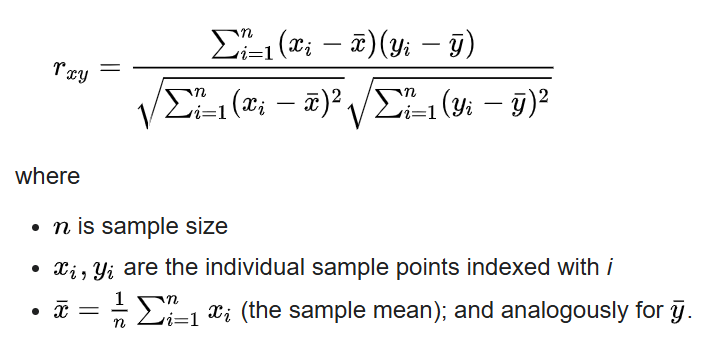

But, if the variables are measured in Ordinal Level/Scale then we use the **Spearman Rank Correlation Coefficient, ρ (rho)**.

- **Positive Correlation:** Both Variables Move Together.
0 < r <= 1.
- **Negative Correlation:** The Variables Move in Opposite Direction. -1 =< r > 0
- **No Correlation:** No Relationship Exists. r = 0

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation between features and the target variable (MEDV)
print(correlation_matrix['MEDV'])

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
MEDV          1.000000
Name: MEDV, dtype: float64


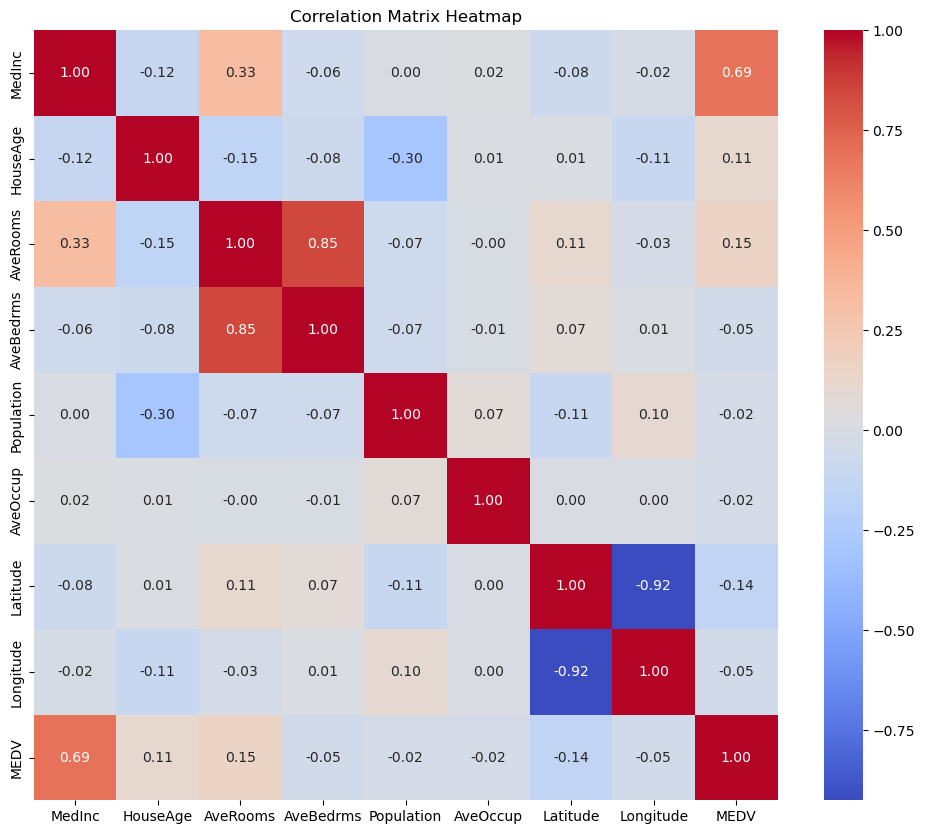

In [9]:
# Create a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()